Робин Гуд бросает камень с привязанным к нему письмом
через бойницу крепостной стены в открытое окно, стоящего за ней замка:
``` 
                    стена                    замок
                    _____ 
                   [     ]                  ______ 
                   [     ]                 [      ]
                   [_____]                 [      ]
                   бойница                 [      ]
                    _____                  [      ]
                   [     ]                 [      ]
                   [     ]                   окно ]
                   [     ]                 [      ]
                   [     ]                 [      ]
.                  [     ]                 [      ]
 \0 _              [     ]                 [      ]
  I                [     ]                 [      ]
 / \               [     ]                 [      ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
```

Смоделируйте полет и рассмотрите следующие события: 
   1. камень упал на землю, не долетев до окна (либо до, либо после стены);
   2. камень не попал в бойницу (ударился о стену);
   3. камень застрял в бойнице (стукнулся о <<пол>> или <<потолок>> бойницы и упал внутри нее); 
   4. камень стукнулся о  стену замка (не попав в окно);
   5. камень попал в окно 
      (для простоты считаем, что и крепостная стена, и замок очень высокие
      и сверху через них камень перебросить нельзя).
При наступлении каждого из этих событий вычисления прекращаются. 

Написать функцию, на вход которой подаются:
  * параметры:
    масса камня,
    расстояние от Робин Гуда до стены,
    толщину стены (равную длине бойницы),
    расстояние от земли до бойницы и высоту бойницы,
    расстояние от стены до замка,
    расстояние от земли до окна и высоту окна,

  * начальные условия:
    угол броска и начальную скорость камня.

Программа должна отображать «вид сбоку»  и траекторию полета.


<Figure size 1152x864 with 0 Axes>

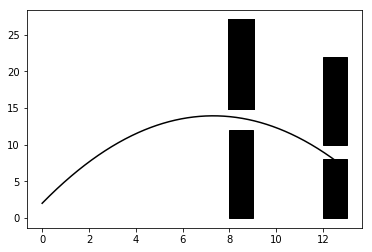

hit


In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from math import sin, cos, pi, sqrt;
import matplotlib.patches as patches

g = 9.8 
# координаты броска
x0 = 0
y0 = 2 
# скорость
v0 = 16
# угол
angle_gr = 73
# расстояние до стены
wall_dist = 8
# ширина стены
wall_width = 1
# высота низа бойницы
wall_height = 12 
# высота бойницы
wall_window_height = 3 
# расстояние от стены до замка
wall_castle_dist = 3 
# высота окна замка
castle_height = 8 
# ширина стены замка(лишь для построения рисунка)
castle_width = 1
# высота окна
castle_window_height = 2 
# вычисление координаты х
def x_coord(t, x0, v0_x):
    return x0 + v0_x * t
# вычисление координаты у
def y_coord(t, y0, v0_y):
    return y0 + v0_y * t - g * t ** 2 / 2
# вычисление момента времени, когда будет точке с координатой х# вычисление момента времени, когда будет точке с координатой у(2 значения: до и после максимума)
def t_x(x, x0, v0_x):
    return (x - x0) / v0_x
# вычисление момента времени, когда будет точке с координатой у(2 значения: до и после максимума)
def t_y(y, y0, v0_y):
    return (v0_y - sqrt(v0_y**2 + 2 * g * (y0 - y))) / g, (v0_y + sqrt(v0_y**2 + 2 * g * (y0 - y))) / g
# вычисление момента времени, когда будет в верхней точке траектории
def t_y_max(v0_y):
    return v0_y / g

def stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height ):
    # вычисление нужных координат стен
    wall_end = wall_dist + wall_width
    castle_dist = wall_end + wall_castle_dist
    castle_end = castle_dist + castle_width
    wall_win_top = wall_height + wall_window_height
    castle_win_top = castle_height + castle_window_height
    # перевод угла в радианы и нахождение проекций начальной скорости
    angle = pi * angle_gr / 180
    v0x = v0 * cos(angle)
    v0y = v0 * sin(angle)
    # координата у при достижении стены
    tx = t_x(wall_dist, x0, v0x)
    x_in_wall = x_coord(tx, x0, v0x)
    y_in_wall = y_coord(tx, y0, v0y)
    tx = t_x(wall_end, x0, v0x)
    x_out_wall = x_coord(tx, x0, v0x)
    y_out_wall = y_coord(tx, y0, v0y)
    tx = t_x(castle_dist, x0, v0x)
    x_in_castle = x_coord(tx, x0, v0x)
    y_in_castle = y_coord(tx, y0, v0y)
    tm = t_y_max(v0y)
    x_max = x_coord(tm, x0, v0x)
    y_max = y_coord(tm, y0, v0y)
    #рисование стены и замка
    
    wall_bottom = patches.Rectangle((wall_dist, 0),
                                wall_width, wall_height,
                                edgecolor='black', facecolor='black')
    wall_top = patches.Rectangle((wall_dist, wall_height+wall_window_height),
                             wall_width, wall_height,
                             linewidth=3, edgecolor='black', facecolor='black')
    castle_bottom = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, 0),
                                  castle_width, castle_height,
                                  edgecolor='black', facecolor='black')
    castle_top = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, castle_height+castle_window_height),
                               castle_width, wall_height,
                               edgecolor='black', facecolor='black')
    fig = plt.figure(figsize=(16, 12))
    _, ax = plt.subplots()
    ax.add_patch(wall_bottom)
    ax.add_patch(wall_top)
    ax.add_patch(castle_bottom)
    ax.add_patch(castle_top)
    #флажок попадания
    hit = True
    # полетел ниже бойницы
    if y_in_wall < wall_height: 
        ty = t_y(0, y0, v0y)[1]
        # не долетел до стены
        if x_coord(ty, x0, v0x) < wall_dist:
            ts = np.linspace(0, ty, 500)
            # долетел, но не попал
        else:
            ts = np.linspace(0, t_x(wall_dist, x0, v0x), 500)
        hit = False
         # полетел выше бойницы
    elif y_in_wall > wall_win_top: 
        ts = np.linspace(0, t_x(wall_dist, x0, v0x), 500)
        hit = False
        # ударился о низ бойницы
    elif y_out_wall < wall_height: 
        ts = np.linspace(0, t_x(wall_dist, x0, v0x), 500)
        hit = False
        # ударился о верх бойницы
    elif y_out_wall > wall_win_top: 
        ts = np.linspace(0, t_x(wall_dist, x0, v0x), 500)
        hit = False
        # полетел ниже окна замка
    elif y_in_castle < castle_height: 
        ts = np.linspace(0, t_x(castle_dist, x0, v0x), 500)
        hit = False
        # полетел выше окна замка
    elif y_in_castle > castle_win_top: 
        ty = t_y(0, y0, v0y)[1]
        if x_coord(ty, x0, v0x) < castle_dist:
            ts = np.linspace(0, ty, 500)
        else:
            ts = np.linspace(0, t_x(castle_dist, x0, v0x), 500)
        hit = False
        # по траектории пролетал бойницу, но задел в ней потолок
    elif (y_in_wall > wall_height and y_in_wall < wall_win_top and
        y_out_wall > wall_height and y_out_wall < wall_win_top and
        x_max > wall_dist and x_max < wall_end and
        y_max > wall_win_top):
        ts = np.linspace(0, t_x(wall_end, x0, v0x), 500)
        hit = False
        # попал в окно замка
    else:
        ts = np.linspace(0, t_x(castle_end, x0, v0x), 500)
# ts - интервал времени от броска до попадания куда-либо
    # вычисление траектории полета
    x_coords = [x_coord(t, x0, v0x) for t in ts]
    y_coords = [y_coord(t, y0, v0y) for t in ts]
    # построение траектории
    ax.plot(x_coords, y_coords, color=(0,0,0))
    plt.show()
     # попал/не попал
    return hit
    
st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")

Вычисления можно производить, задавая все необходимые параметры вначале и меняя только некоторые части потом для корректировки броска.
Само собой, и в последующих блоках можно заново задать все значения и вызвать функцию. 
Далее примеры:

<Figure size 1152x864 with 0 Axes>

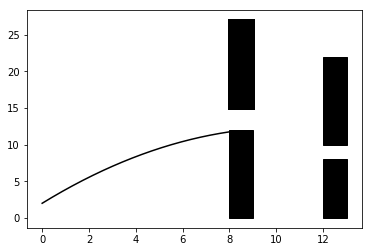

fail


In [40]:
v0 = 16
angle_gr = 63    
wall_dist = 8
st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")



<Figure size 1152x864 with 0 Axes>

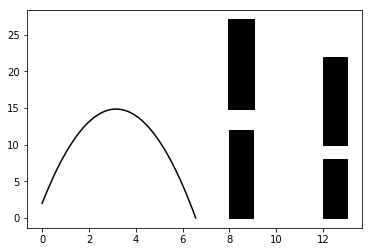

fail


In [28]:
v0 = 16
angle_gr = 83
st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")

<Figure size 1152x864 with 0 Axes>

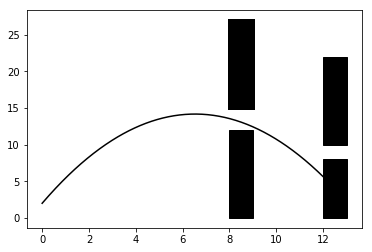

fail


In [29]:
v0 = 16
angle_gr = 75
st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")

<Figure size 1152x864 with 0 Axes>

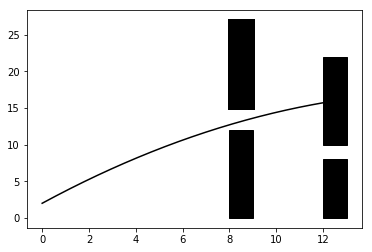

fail


In [30]:
v0 = 20
angle_gr = 60
st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")

Как видим, первый пример был самым удачным )) Но ничего не мешает нам отодвинуть стену и бросить камень со скоростью пули 

<Figure size 1152x864 with 0 Axes>

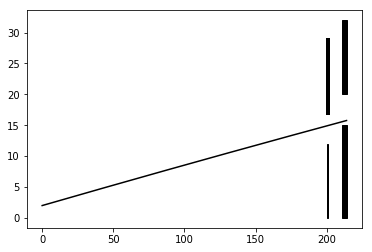

hit


In [60]:
v0 = 710
angle_gr = 3.8
wall_dist = 200
wall_height = 12 
wall_window_height = 5
wall_castle_dist = 10
castle_height = 15
castle_width = 3
castle_window_height = 5

st = stone(x0, y0, v0, angle_gr, 
         wall_dist, wall_width, wall_height, wall_window_height, 
         wall_castle_dist, castle_height, castle_width, castle_window_height)

if st:
    print("hit")
else:
    print("fail")

Моделировать подобные события можем бесконечно.
Конец.